# CIT AI Youth Camp 2025 - Praktikum 2.2 Klasifikasi Muliclass
*dipersiapkan oleh: Yozef Tjandra*

Tujuan pembelajaran:
* Peserta mampu mengimplementasikan klasifikasi multiclass dengan library Scikitlearn secara lengkap.
* Peserta mampu melakukan analisis hasil kinerja klasifikasi dengan metrik evaluasi yang tepat.

## 01 Import pustaka untuk melakukan klasifikasi

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 02 Tarik dataset untuk melakukan klasifikasi

* Dataset yang digunakan adalah mengenai klasifikasi jenis beans berdasarkan beberapa karakteristik tertentu. 
* Terdapat 16 input/fitur data. 
* Terdapat 7 label yang mungkin dalam output data (memiliki judul kolom ```"Class"```).

| No | Nama Kolom         | Tipe Data | Penjelasan                                                                 |
|----|--------------------|-----------|----------------------------------------------------------------------------|
| 1  | Area               | Numerik   | Luas total dari kacang (jumlah piksel dalam kontur objek).                |
| 2  | Perimeter          | Numerik   | Keliling objek kacang.                                                    |
| 3  | MajorAxisLength    | Numerik   | Panjang sumbu utama dari elips yang pas terhadap objek.                  |
| 4  | MinorAxisLength    | Numerik   | Panjang sumbu kecil dari elips.                                           |
| 5  | AspectRation       | Numerik   | Rasio antara sumbu utama dan sumbu kecil (MajorAxis / MinorAxis).        |
| 6  | Eccentricity       | Numerik   | Mengukur seberapa lonjong bentuk objek (nilai antara 0 - 1).             |
| 7  | ConvexArea         | Numerik   | Luas dari bentuk konveks yang mengelilingi kacang.                        |
| 8  | EquivDiameter      | Numerik   | Diameter lingkaran yang memiliki luas sama dengan objek.                 |
| 9  | Extent             | Numerik   | Rasio antara area objek dengan area dari bounding box.                   |
| 10 | Solidity           | Numerik   | Rasio antara area objek dengan area konveks (Area / ConvexArea).         |
| 11 | roundness          | Numerik   | Ukuran seberapa mendekati bentuk bulat (dari keliling dan luas).         |
| 12 | Compactness        | Numerik   | Mengukur seberapa padat objek itu (perimeter² / area).                   |
| 13 | ShapeFactor1       | Numerik   | Faktor bentuk berbasis fitur geometri.                                   |
| 14 | ShapeFactor2       | Numerik   | Faktor bentuk lainnya.                                                   |
| 15 | ShapeFactor3       | Numerik   | Faktor bentuk lainnya.                                                   |
| 16 | ShapeFactor4       | Numerik   | Faktor bentuk lainnya.                                                   |
| 17 | Class              | Kategorik | Label jenis kacang: 'SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', dll.          |

In [ ]:
# Membaca file CSV bernama 'Dry_Beans_Dataset.csv' dan menyimpannya ke dalam variabel DataFrame 'data'
data = 

# Menampilkan 20 baris pertama dari dataset untuk melihat isi dan struktur data


,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,2,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,3,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,4,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,5,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,6,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,7,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,8,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,9,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,10,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


## 03 Eksplorasi dan Visualisasi Data

In [ ]:
# Cek dimensi dan informasi umum
print("Jumlah data:", data.shape[0])
print("Jumlah fitur:", data.shape[1] - 1)  # dikurangi label
print("\nInfo dataset:")
print(data.info())
print("\nContoh 5 baris data:")
display(data.head())


In [ ]:
# Cek apakah ada nilai kosong
print("\nJumlah nilai kosong per kolom:")
print(data.isnull().sum())

<Axes: xlabel='Class', ylabel='count'>

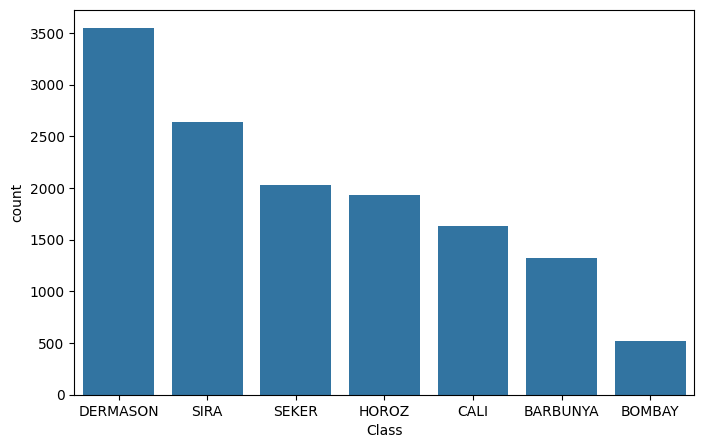

In [ ]:
# Distribusi label (kelas kacang)
plt.figure(figsize=(8, 5))



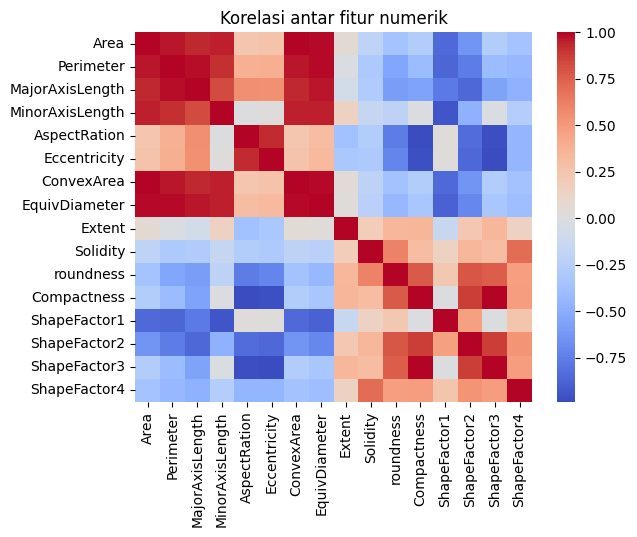

In [ ]:
# Korelasi antar fitur numerik


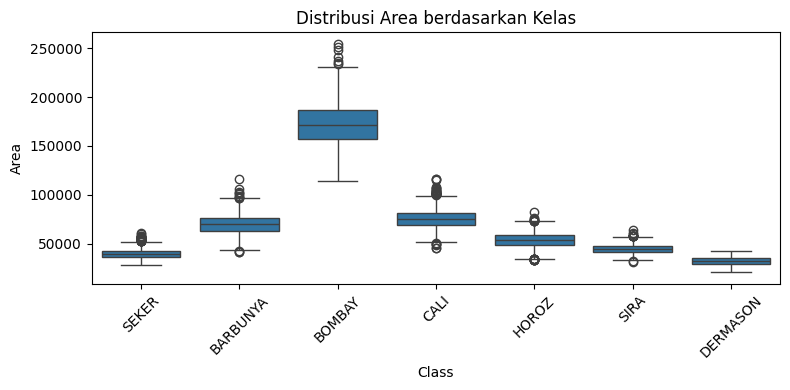

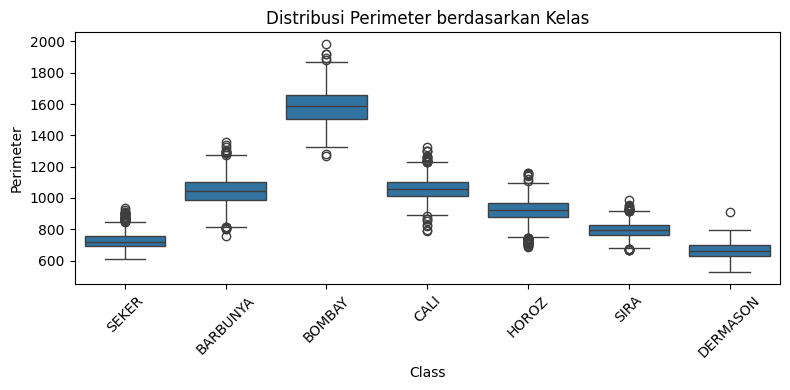

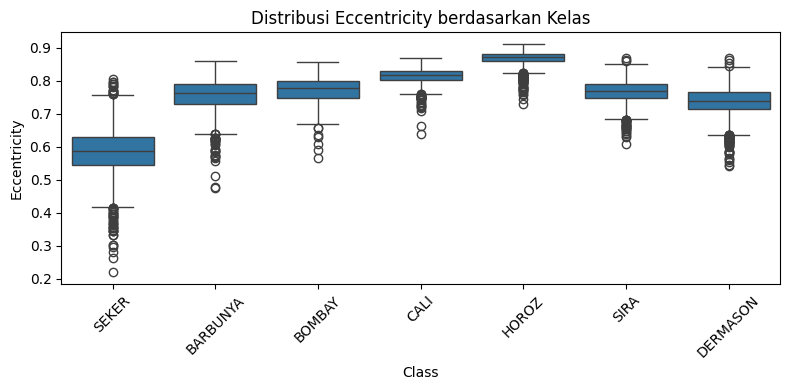

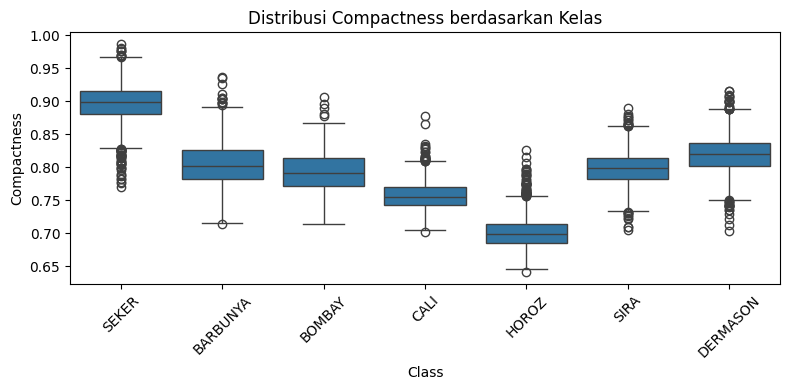

In [ ]:
# Visualisasi distribusi fitur berdasarkan kelas
fitur_pilihan = ['Area', 'Perimeter', 'Eccentricity', 'Compactness']
for col in fitur_pilihan:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x="Class", y=col)
    plt.title(f"Distribusi {col} berdasarkan Kelas")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Eksplorasi: coba variasikan fitur_pilihan dengan fitur lain


## 04 Melakukan pemisahan Data Latih dan Data Uji

In [ ]:
from sklearn.model_selection import train_test_split

# Menetapkan variabel target (label) sebagai kolom 'Class'
y = 

# Menghapus kolom 'Bean ID' dan 'Class' dari data fitur
# 'Bean ID' adalah ID unik yang tidak relevan untuk prediksi
X = 

# Membagi data menjadi 80% data latih dan 20% data uji
# random_state=0 agar hasil pembagian konsisten setiap kali dijalankan
X_train, X_test, y_train, y_test = 

# Menampilkan jumlah data latih dan data uji
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")    


Jumlah data latih: 10888
Jumlah data uji: 2723


## 05 Membuat dan melatih model Regresi Logistik

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression (menggunakan parameter default)
logreg = LogisticRegression()

# Melatih model menggunakan data latih (fitur dan label)


# Menggunakan model untuk memprediksi label dari data uji
y_pred = 

# Membuat DataFrame untuk membandingkan label sebenarnya dengan hasil prediksi
compare = pd.DataFrame({"y_true": y_test, "y_pred": y_pred})

# Menampilkan tabel perbandingan
display(compare)

/Users/yozeftjandra/opt/anaconda3/envs/torch/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,y_true,y_pred
13027,DERMASON,DERMASON
11035,DERMASON,DERMASON
13205,DERMASON,SEKER
7578,SIRA,DERMASON
1961,SEKER,SEKER
...,...,...
8927,SIRA,SIRA
9916,SIRA,HOROZ
1343,SEKER,SEKER
2158,BARBUNYA,HOROZ


In [ ]:
# visualisasi distribusi prediksi benar vs salah per kelas

compare["correct"] = compare["y_true"] == compare["y_pred"]

plt.figure(figsize=(10, 6))
sns.countplot(data=compare, x="y_true", hue="correct", palette={True: "green", False: "red"})
plt.title("Distribusi Prediksi Benar vs Salah per Kelas")
plt.xlabel("Kelas Asli")
plt.ylabel("Jumlah")
plt.legend(title="Benar?")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 06 Melakukan Evaluasi Model

In [ ]:
# Mengimpor modul 'metrics' dari scikit-learn yang berisi fungsi-fungsi evaluasi model
from sklearn import metrics

# Membuat confusion matrix berdasarkan label asli (y_test) dan label hasil prediksi (y_pred)
cnf_matrix = 

# Menampilkan confusion matrix dalam bentuk array 2D
cnf_matrix

array([[128,   0,  76,   0,  46,   0,   5],
       [  0,  92,   0,   0,   0,   0,   0],
       [ 85,   0, 249,   0,  11,   2,   3],
       [  0,   0,   0, 661,  10,  17,  47],
       [  6,   0,  18,  14, 227,   4, 121],
       [  0,   0,   0,  94,   4, 219,  59],
       [  0,   0,   0,  44,  69,  57, 355]])

In [ ]:
# visualisasi confusion matrix menggunakan seaborn

# Ambil daftar unik nama kelas dari label asli (y)
class_names = list(y.unique())  # nama-nama kelas
print(class_names)

# Buat area plotting
fig, ax = plt.subplots()

# Visualisasi confusion matrix dalam bentuk heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# Atur posisi label sumbu-x ke atas
ax.xaxis.set_label_position("top")

# Tentukan posisi tick (label sumbu)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=30, ha="right")       # Label prediksi (sumbu-x)
plt.yticks(tick_marks, class_names, rotation='horizontal')         # Label aktual (sumbu-y)

# Atur tampilan layout agar tidak saling bertabrakan
plt.tight_layout()

# Tambahkan judul dan label sumbu
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# tampilkan classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.58      0.50      0.54       255
      BOMBAY       1.00      1.00      1.00        92
        CALI       0.73      0.71      0.72       350
    DERMASON       0.81      0.90      0.85       735
       HOROZ       0.62      0.58      0.60       390
       SEKER       0.73      0.58      0.65       376
        SIRA       0.60      0.68      0.64       525

    accuracy                           0.71      2723
   macro avg       0.73      0.71      0.71      2723
weighted avg       0.71      0.71      0.71      2723



## Tugas Praktikum

1. Lakukan proses klasifikasi dengan menggunakan dataset HARTH: https://archive.ics.uci.edu/dataset/779/harth
2. Lakukan proses evaluasi dengan confusion matrix & classification report.